In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [8]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [42]:
model =cv2.dnn_DetectionModel(frozen_model,config_file)

In [43]:
ClassLabels = []
file_name='labels.txt'

In [44]:
with open(file_name,'rt') as fpt:
    ClassLabels=fpt.read().rstrip('\n').split('\n')

In [51]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 000000F8AD51FD90>

In [118]:
img=cv2.imread('second.jpeg')

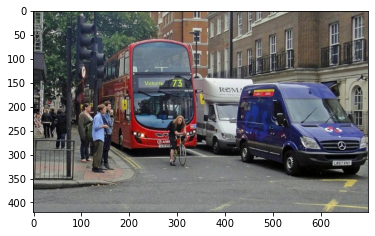

In [119]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [120]:
ClassIndex,confidece ,bbox=model.detect(img,confThreshold =0.60)

In [121]:
print(ClassIndex)

[[1]
 [6]
 [1]
 [3]
 [1]
 [1]]


In [122]:
font_scale=3
font =cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,ClassLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

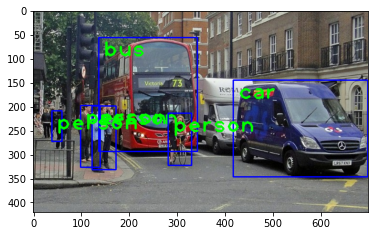

In [123]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))